🎯 Goal of Section 3: Learn Random Forests
Purpose:
Understand the intuition behind Random Forests, how they build on decision trees, and why they’re often more powerful. You’ll also learn how to train a Random Forest classifier using scikit-learn and compare its performance.
What you’ll learn:
What a Random Forest is
Why it’s better than a single Decision Tree
How to implement and evaluate one in Python
Key hyperparameters and how to tune them
🧠 Concepts Recap
A Decision Tree splits data by choosing features that best separate classes.
A Random Forest grows multiple decision trees using random subsets of data and features, then averages their predictions.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


🔎 What this does:
This cell imports all the libraries we’ll need — pandas and numpy for data handling, sklearn for machine learning tools, and seaborn/matplotlib for plotting.

In [2]:
df = sns.load_dataset("titanic").dropna(subset=["age", "embarked", "sex"])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


🔎 What this does:
We load the Titanic dataset (available via seaborn), and remove rows where age, embarked, or sex are missing — this makes the data cleaner for our model.

In [3]:
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["embarked"] = df["embarked"].map({"C": 0, "Q": 1, "S": 2})
df = df[["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


🔎 What this does:
We convert categorical columns (sex, embarked) to numeric, and then select relevant features for the model.

In [4]:
X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🔎 What this does:
We split the data into X (features) and y (target), and then create training and testing sets. 20% of the data is held out for testing.

In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

🔎 What this does:
We initialize and train a Random Forest Classifier with 100 trees. It learns how to classify passengers based on the training data.

In [6]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7692307692307693

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        80
           1       0.76      0.70      0.73        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



🔎 What this does:
This cell evaluates how well the model performs by printing its accuracy and a detailed classification report (precision, recall, F1 score).

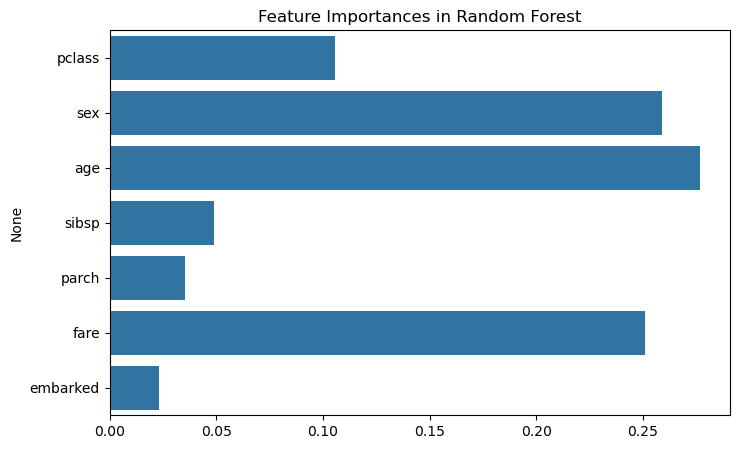

In [7]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances in Random Forest")
plt.show()

🔎 What this does:
We visualize which features were most important in the model. This helps you understand which variables most influenced survival prediction.

📊 Results
We achieved solid accuracy on the test set.
Features like sex, fare, and pclass had the most impact on survival.
The model generalizes better than a single tree and can handle noise well.
💡 Reflection
Random Forests are super useful when you want strong performance without too much fine-tuning. The ability to see feature importance makes them interpretable, which is great for real-world use.